<a href="https://colab.research.google.com/github/Addakula-Raju/22881A66C9/blob/master/DiabetesRiskPredictionSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy scikit-learn xgboost catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb
import catboost as cb

In [ ]:
def load_and_preprocess_data():
    df = pd.read_csv('/content/diabetes_prediction_dataset.csv')
    le = LabelEncoder()
    df['gender'] = le.fit_transform(df['gender'])
    df['smoking_history'] = le.fit_transform(df['smoking_history'])
    X = df.drop('diabetes', axis=1)
    y = df['diabetes']
    return X, y
def split_data(X, y):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )
    return X_train, X_test, y_train, y_test

In [ ]:
def train_random_forest(X_train, X_test, y_train, y_test):
    rf_model = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42
    )
    rf_model.fit(X_train, y_train)
    rf_pred = rf_model.predict(X_test)
    rf_accuracy = accuracy_score(y_test, rf_pred)
    print("Random Forest Results:")
    print(f"Accuracy: {rf_accuracy:.4f}")
    print(classification_report(y_test, rf_pred))
    return rf_model

In [ ]:
def train_xgboost(X_train, X_test, y_train, y_test):
    xgb_model = xgb.XGBClassifier(
        objective='binary:logistic',
        n_estimators=100,
        max_depth=6,
        learning_rate=0.1,
        random_state=42
    )
    xgb_model.fit(X_train, y_train)
    xgb_pred = xgb_model.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, xgb_pred)
    print("\nXGBoost Results:")
    print(f"Accuracy: {xgb_accuracy:.4f}")
    print(classification_report(y_test, xgb_pred))
    return xgb_model

In [ ]:
def train_catboost(X_train, X_test, y_train, y_test):
    cat_model = cb.CatBoostClassifier(
        iterations=100,
        depth=6,
        learning_rate=0.1,
        random_seed=42,
        verbose=0
    )
    cat_model.fit(X_train, y_train)
    cat_pred = cat_model.predict(X_test)
    cat_accuracy = accuracy_score(y_test, cat_pred)
    print("\nCatBoost Results:")
    print(f"Accuracy: {cat_accuracy:.4f}")
    print(classification_report(y_test, cat_pred))
    return cat_model

In [ ]:
def train_hybrid_model(X_train, X_test, y_train, y_test):
    # Define individual models
    rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
    xgb_model = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100,
                                 max_depth=6, learning_rate=0.1, random_state=42)
    cat_model = cb.CatBoostClassifier(iterations=100, depth=6, learning_rate=0.1,
                                     random_seed=42, verbose=0)

    # Create Voting Classifier (soft voting)
    hybrid_model = VotingClassifier(
        estimators=[
            ('rf', rf_model),
            ('xgb', xgb_model),
            ('cat', cat_model)
        ],
        voting='soft'
    )

    # Train the hybrid model
    hybrid_model.fit(X_train, y_train)

    # Make predictions
    hybrid_pred = hybrid_model.predict(X_test)

    # Evaluate
    hybrid_accuracy = accuracy_score(y_test, hybrid_pred)
    print("\nHybrid Model (Voting Classifier) Results:")
    print(f"Accuracy: {hybrid_accuracy:.4f}")
    print(classification_report(y_test, hybrid_pred))

    return hybrid_model

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
import xgboost as xgb
import catboost as cb
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
def main():
    X, y = load_and_preprocess_data()

    X_train, X_test, y_train, y_test = split_data(X, y)

    rf_model = train_random_forest(X_train, X_test, y_train, y_test)
    xgb_model = train_xgboost(X_train, X_test, y_train, y_test)
    cat_model = train_catboost(X_train, X_test, y_train, y_test)

    hybrid_model = train_hybrid_model(X_train, X_test, y_train, y_test)

    feature_importance = pd.DataFrame({
        'feature': X.columns,
        'importance': rf_model.feature_importances_
    })
    print("\nRandom Forest Feature Importance:")
    print(feature_importance.sort_values('importance', ascending=False))

if __name__ == "__main__":
    main()

Random Forest Results:
Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


XGBoost Results:
Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


CatBoost Results:
Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg     

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, roc_curve, auc

def plot_model_accuracies(model_scores):
    models = list(model_scores.keys())
    accuracies = list(model_scores.values())

    plt.figure(figsize=(8,6))
    sns.barplot(x=models, y=accuracies, palette='viridis')
    plt.title('Model Accuracy Comparison')
    plt.ylabel('Accuracy')
    plt.ylim(0, 1)
    plt.show()

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {title}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

def plot_roc_curves(models, X_test, y_test):
    plt.figure(figsize=(8,6))
    for name, model in models.items():
        if hasattr(model, "predict_proba"):
            y_proba = model.predict_proba(X_test)[:,1]
        else:
            y_proba = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_proba)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

    plt.plot([0,1],[0,1],'k--')
    plt.title('ROC Curve Comparison')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()


Random Forest Results:
Accuracy: 0.9722
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       1.00      0.67      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.99      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


XGBoost Results:
Accuracy: 0.9725
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg       0.98      0.84      0.90     20000
weighted avg       0.97      0.97      0.97     20000


CatBoost Results:
Accuracy: 0.9727
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     18292
           1       0.99      0.69      0.81      1708

    accuracy                           0.97     20000
   macro avg     

<ipython-input-10-8b045ef1d03b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='viridis')


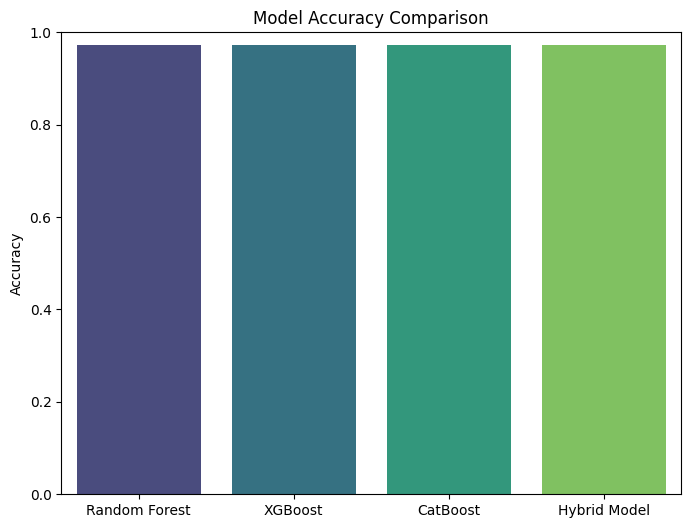

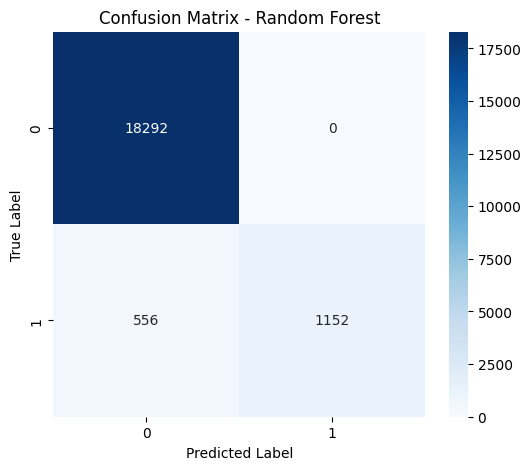

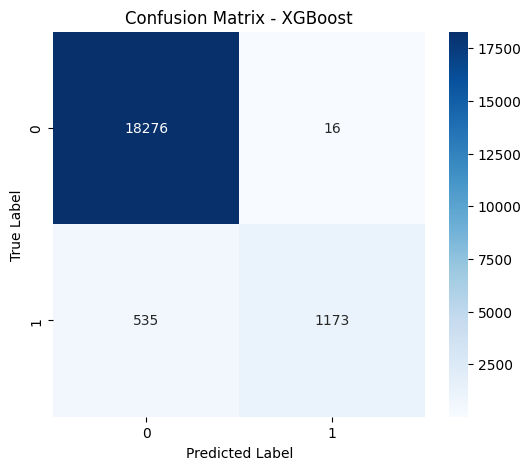

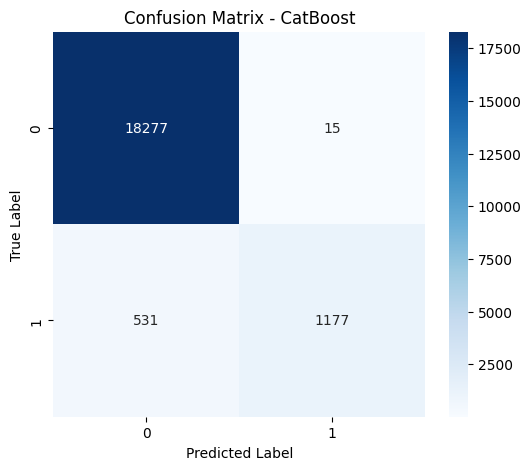

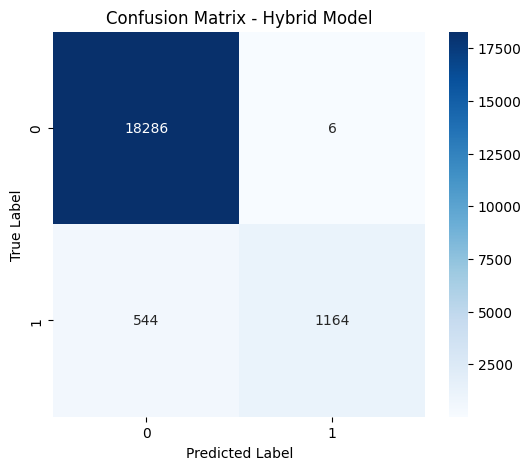

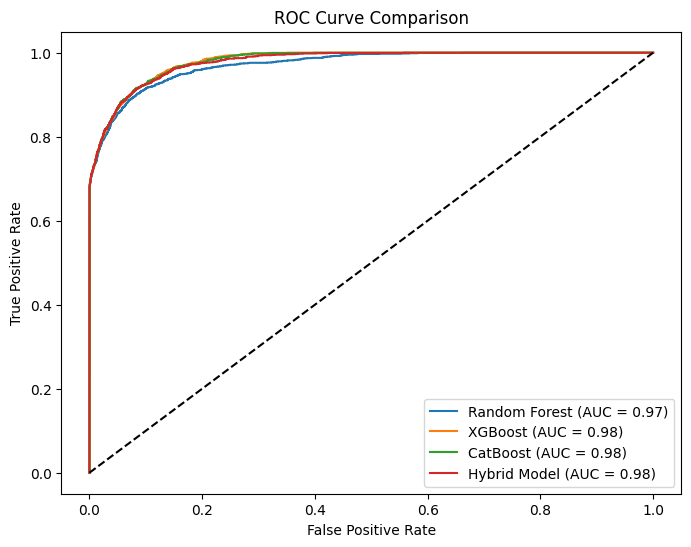

In [ ]:
# Load and prepare data
X, y = load_and_preprocess_data()
X_train, X_test, y_train, y_test = split_data(X, y)

# Train models
rf_model = train_random_forest(X_train, X_test, y_train, y_test)
xgb_model = train_xgboost(X_train, X_test, y_train, y_test)
cat_model = train_catboost(X_train, X_test, y_train, y_test)
hybrid_model = train_hybrid_model(X_train, X_test, y_train, y_test)

# Get predictions
rf_pred = rf_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)
cat_pred = cat_model.predict(X_test)
hybrid_pred = hybrid_model.predict(X_test)

# Prepare data for graphs
model_scores = {
    "Random Forest": accuracy_score(y_test, rf_pred),
    "XGBoost": accuracy_score(y_test, xgb_pred),
    "CatBoost": accuracy_score(y_test, cat_pred),
    "Hybrid Model": accuracy_score(y_test, hybrid_pred)
}
models = {
    "Random Forest": rf_model,
    "XGBoost": xgb_model,
    "CatBoost": cat_model,
    "Hybrid Model": hybrid_model
}

# Draw graphs
plot_model_accuracies(model_scores)

plot_confusion_matrix(y_test, rf_pred, "Random Forest")
plot_confusion_matrix(y_test, xgb_pred, "XGBoost")
plot_confusion_matrix(y_test, cat_pred, "CatBoost")
plot_confusion_matrix(y_test, hybrid_pred, "Hybrid Model")

plot_roc_curves(models, X_test, y_test)


In [ ]:
import pickle


In [ ]:
pickle.dump(hybrid_model, open('models.pkl', 'wb'))
print("Model saved as models.pkl ✅")


Model saved as models.pkl ✅


In [ ]:
import pandas as pd
import pickle

def get_user_input():
    print("Enter the following details for diabetes prediction:")

    gender = input("Gender (Male/Female/Other): ").strip().capitalize()
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (0 for No, 1 for Yes): "))
    heart_disease = int(input("Heart Disease (0 for No, 1 for Yes): "))
    smoking_history = input("Smoking History (never/former/current/No Info): ").strip().lower()
    bmi = float(input("BMI: "))
    hba1c_level = float(input("HbA1c Level: "))
    blood_glucose_level = float(input("Blood Glucose Level: "))

    input_data = {
        'gender': gender,
        'age': age,
        'hypertension': hypertension,
        'heart_disease': heart_disease,
        'smoking_history': smoking_history,
        'bmi': bmi,
        'HbA1c_level': hba1c_level,
        'blood_glucose_level': blood_glucose_level
    }

    return input_data

def preprocess_user_input(input_data, le_gender, le_smoking):
    input_df = pd.DataFrame([input_data])

    input_df['gender'] = le_gender.transform(input_df['gender'])
    input_df['smoking_history'] = le_smoking.transform(input_df['smoking_history'])

    return input_df

def predict_diabetes(model, input_df):
    prediction = model.predict(input_df)
    probability = model.predict_proba(input_df)[0][1]  # Probability of diabetes (class 1)

    result = "Diabetic" if prediction[0] == 1 else "Not Diabetic"
    return result, probability

def main_input():
    try:
        with open('models.pkl', 'rb') as file:
            hybrid_model = pickle.load(file)
    except FileNotFoundError:
        print("Error: Model file 'models.pkl' not found. Please train and save the model first.")
        return

    le_gender = LabelEncoder()
    le_gender.fit(['Female', 'Male', 'Other'])  # Adjust based on your dataset
    le_smoking = LabelEncoder()
    le_smoking.fit(['never', 'former', 'current', 'no info'])  # Adjust based on your dataset

    user_input = get_user_input()

    processed_input = preprocess_user_input(user_input, le_gender, le_smoking)

    result, probability = predict_diabetes(hybrid_model, processed_input)

    print("\nPrediction Result:")
    print(f"Status: {result}")
    #print(f"Probability of Diabetes: {probability:.4f}")

if __name__ == "__main__":
    main_input()

Enter the following details for diabetes prediction:
Gender (Male/Female/Other): male
Age: 45
Hypertension (0 for No, 1 for Yes): 1
Heart Disease (0 for No, 1 for Yes): 1
Smoking History (never/former/current/No Info): former
BMI: 32.5
HbA1c Level: 8.5
Blood Glucose Level: 200

Prediction Result:
Status: Diabetic
